#**Objective of the Proposed Research**

The purpose of this study is to evaluate parameters, such as soil, fertilizers, climate and weather change ,concentration of micro and macro nutrients  may affect farm profitability, particularly in relation to crop output. The quick climatic change and efficient fertilizer application have an impact on soil health.

```
Stakeholder

```
**AMS Corporation**




Our goal in working with AMS corporation is to choose the best crop for cultivation based on seven parameters that are crucial to obtaining the highest crop production and income.


To develop the crop, you must have previous experience, This is an outdated misconception perpetuated by ancient traditions. Over the years, we gathered data from many places with various characteristics. After evaluating the metrics of the data, we developed a tool to help new and experienced farmers cultivate their crops more effectively. The quantity of a certain nutrient to apply and the ideal period to cultivate particular crops are two additional crucial components of a crop advice. 




#### Importing the Libraries

In [3]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactivity
import ipywidgets
from ipywidgets import interact
import pickle

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

#### Reading the Dataset

In [4]:
# Examine the data.
data = pd.read_csv('Crop_recommendation.csv')

# Examine the dataset's form
print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


#**Data Exploration**: 

In [5]:
# Examine the dataset's head.
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
# Examine the Crops in this Dataset.
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
#Unique Data
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [8]:
#Utilized in the dataset were crops
data['label'].unique() 

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

#**Data Cleaning**: 
#### lets check if there is any missing value present in the dataset

In [9]:
#tracking down empty values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
#summary
crop_summary=pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


#**Adaptation**: 


#### created three additional columns that are necessary for your study

In [11]:
#finding the median
import statistics
data['Avg K'] = statistics.mean(data['K'])
data['Avg N'] = statistics.mean(data['P'])
data['Avg P'] = statistics.mean(data['N'])
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Avg K,Avg N,Avg P
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,48.149091,53.362727,50.551818
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,48.149091,53.362727,50.551818
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,48.149091,53.362727,50.551818
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,48.149091,53.362727,50.551818
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,48.149091,53.362727,50.551818


#**Visualization** :

#**Descriptive Visualization**:

According to the data distribution, there is no association between the various soil restrictions.

Based on a five-number summary, the data distribution is described as "minimum," "first quartile [Q1], median, third quartile [Q3], and "maximum."

Nitrogen distribution for the relevant crops

**Cluster Analysis**:

In [20]:
new_data = data.drop(['label'], axis=1)
from pandas import DataFrame
from sklearn.metrics.pairwise import euclidean_distances
grades_distance_df = DataFrame(euclidean_distances(new_data))
f = grades_distance_df.astype(int)

In [22]:
from scipy.cluster.hierarchy import fcluster
k = 5
dend_clusters = fcluster(Z, k, criterion = 'maxclust')
dend_clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

#**Descriptive Statistics**

In [26]:
# review the Summary for each crop.

print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Tempature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH Value of the soil : 6.47
Average Rainfall in mm : 103.46


In [27]:
# Have a look at the Summary Statistics for each of the Crops.

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [28]:
## Compare each crop's average need with typical weather conditions.

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [29]:
# Improve the intuition of this function.

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

#**Analyzing Agricultural Conditions**

C:\Users\Manideep Reddy\AppData\Local\Temp\ipykernel_10012\3796887630.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['N'], color = 'lightgrey')
C:\Users\Manideep Reddy\AppData\Local\Temp\ipykernel_10012\3796887630.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['P'], color = 

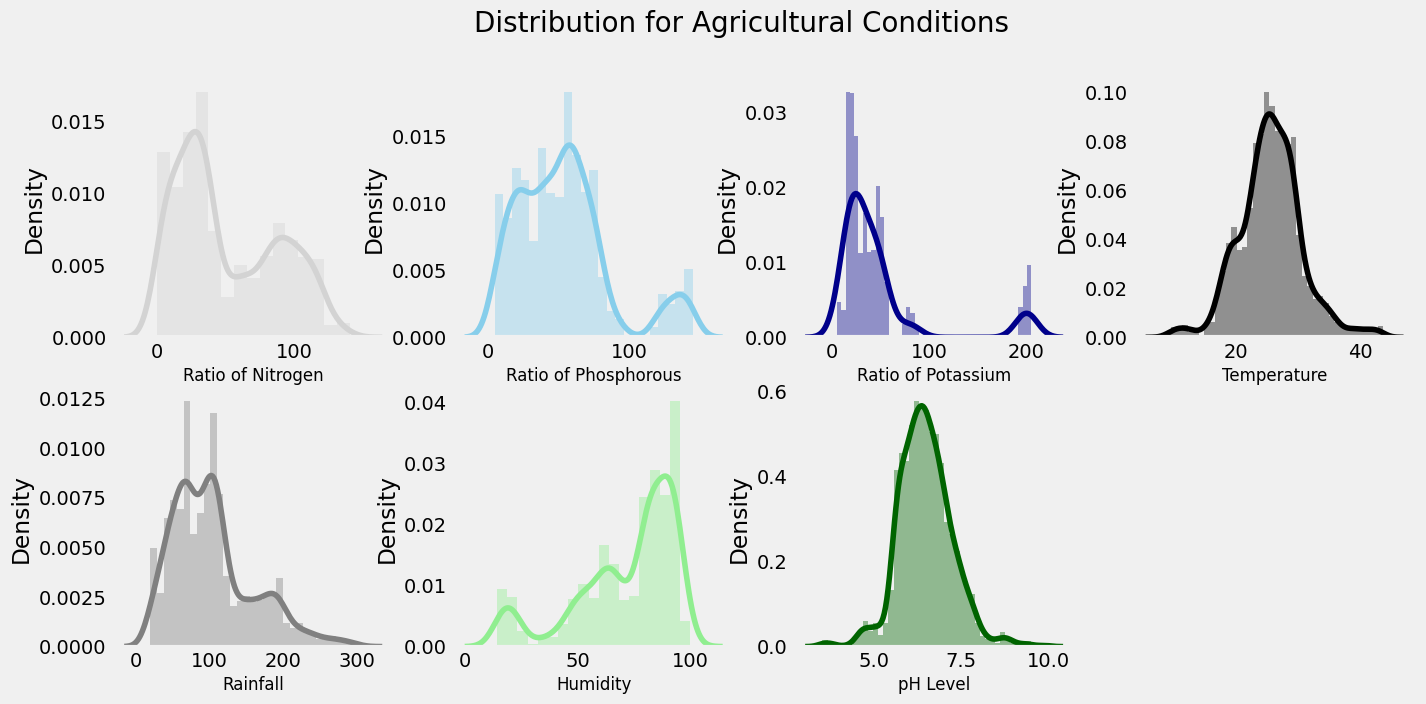

In [30]:
### Look at how agricultural conditions are distributed.

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(data['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()


In [31]:
## Learn some Interesting Facts now.

print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
---------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [32]:
### Learn which crops may only be grown during the summer, winter, and rainy seasons.

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


#**Clustering Similar Crops**

In [33]:
### Try to group these crops together.

# To prevent warnings, import the warnings library.
import warnings
warnings.filterwarnings('ignore')

# Choose the Annual Income and Spending Score columns from the data.
x = data.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values

# Examine x's form.
print(x.shape)

# these information into a dataframe
x_data  = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


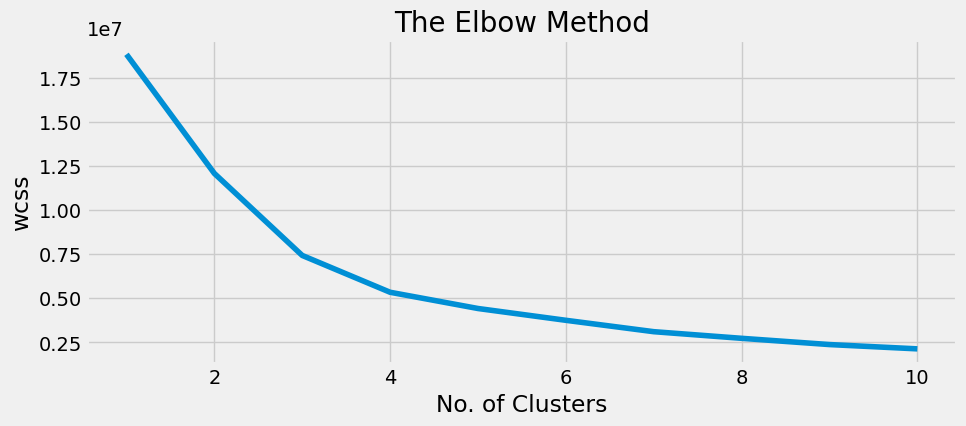

In [34]:
# Calculate the ideal number of clusters for the dataset.

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# Map the outcomes.
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [35]:
# Use the K Means technique to do a cluster analysis.
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# Examine the outcomes
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# Examine each crop's clusters.
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Second Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Third Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [36]:
# Intense Clustering
print("Results for Hard Clustering\n")
counts = z[z['cluster'] == 0]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 1:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 1]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 2:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 2]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 3:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 3]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 4:", list(d.index))

Results for Hard Clustering

Crops in Cluster 1: ['grapes', 'apple']
--------------------------------------------------
Crops in Cluster 2: ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
--------------------------------------------------
Crops in Cluster 3: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------
Crops in Cluster 4: ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


#**Predictive Modelling**

In [37]:
# Divide the predictive modeling data set.

y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 10)
Shape of y: (2200,)


In [38]:
# Build Training and Testing Sets for Results Validation.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 10)
The Shape of x test: (440, 10)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [39]:
# Create a predictive model now.

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

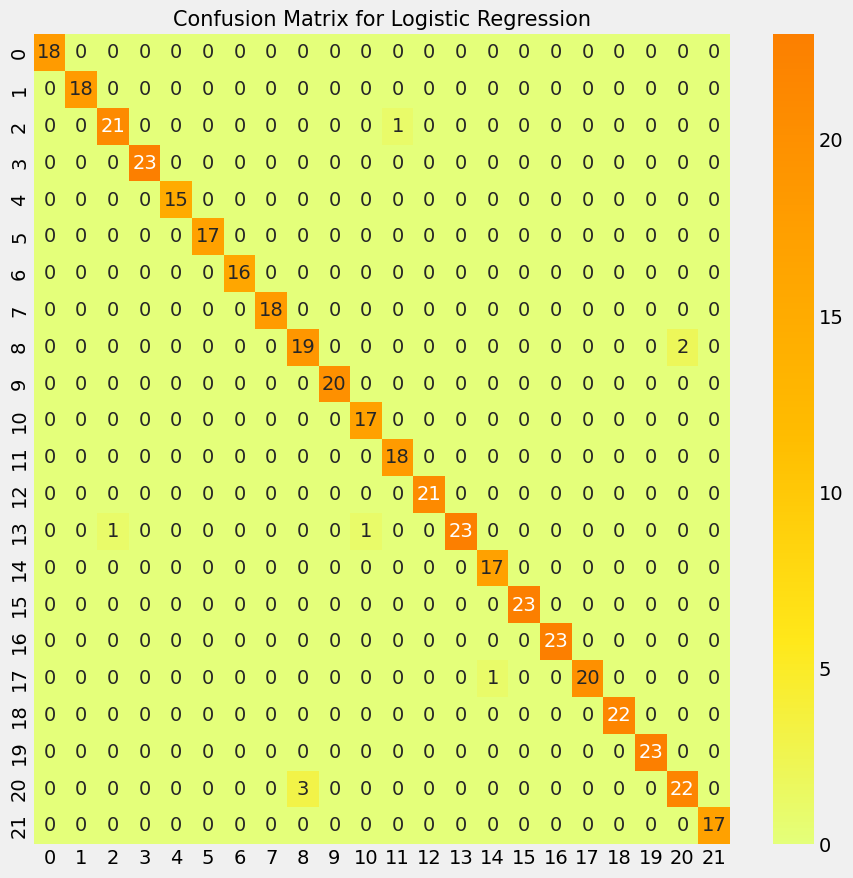

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.95      0.95      0.95        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.90      0.88        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      1.00      0.97        17
       maize       0.95      1.00      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.92      0.96        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [40]:
# Assess the performance of the model.
from sklearn.metrics import classification_report, confusion_matrix

# Firstly, print the Confusion matrix.
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

# Printing the Classification Report as well
cr = classification_report(y_test, y_pred)
print(cr)

#**Real time Predictions**

In [41]:
prediction = model1.predict((np.array([[123,
                                       45,
                                       78,
                                       90,
                                       50,
                                       5,
                                       100,
                                       40,
                                       78,
                                       12]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['coffee']


In [ ]:
import pickle

# Sample object (can be a list, dictionary, model, etc.)
data = {"key": "value"}

# Save the object to a .pkl file
with open("data.pkl", "wb") as prediction:
    pickle.dump(data, prediction)


#**Report/Stakeholder**

***Overall status of the project.***

To develop the crop, you must have previous experience. This is an outdated misconception perpetuated by ancient traditions. <br> 

Over the years, we gathered data from many places with various characteristics. After evaluating the metrics of the data, we developed a tool to help new and experienced farmers cultivate their crops more effectively.<br>

The quantity of a certain nutrient to apply and the ideal period to cultivate particular crops are two additional crucial components of a crop advice. 

***The benefits and call out the impact/dependencies.***

Increasing agricultural output can have a variety of advantages, such as better quality, lower input costs, and higher yields. The type of crop, the growing environment, and the management techniques used by the farmer are only a few of the variables that affect these advantages.

***The issues and next steps.***

The allocation of resources is primarily involved in the optimization of agricultural production. The key challenge is to maximize output while minimizing manufacturing costs. The effective use of land, water, labor, and other resources can help achieve this.

Utilizing resources effectively is crucial to maximizing agricultural output. However, other elements including the state of the market, the weather, and governmental regulations all have an impact on agricultural productivity. Government regulations, for instance, may have an impact on the cost of inputs and outputs, which may then have an impact on the profitability of production. Crop yields and, thus, the financial viability of production, can be impacted by weather conditions.

***Summary of recent decisions, conversations, and assignments allocated.***

The choice to allocate resources to the agricultural sector in order to generate food and other agricultural goods is known as the agricultural production decision. The demands of the populace are taken into account when the government makes this choice. The choice regarding agricultural output is made to make sure that both the agricultural sector and the populace have access to enough food.

***The team's most recent successes in brief.***
Many things contribute to the team's success, including outstanding pitching, timely hitting, and excellent defense. We have a strong and skilled group that can provide outstanding performances when it counts.

***Status updates every week for simple retrieval.***

Utilizing technology, managerial techniques, and legislative actions can enhance the optimization of agricultural production.

In [ ]:
#Story Plot

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(data['N'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(data['P'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(data['K'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(data['humidity'], data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(data['ph'], data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(data['rainfall'], data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()